## INSTRUCTIONS 

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution. 

The homework consists of two parts:
1.	Data from our life
2.	Classification

Follow the prompts in the attached jupyter notebook. We are using the same data as for the previous homeworks. Use the version you created called df2 where you already cleaned, dropped some of the variables but did not create dummy variables. Instead of creating dummy variables, you have to recode this column as suggested bellow.
Add markdown cells to your analysis to include your solutions, comments, answers. Add as many cells as you need, for easy readability comment when possible. 

**Note:** This homework has a bonus question, so the highest mark that can be earned is a 105.
Submission: Send in both a ipynb and a pdf file of your work.
Good luck!



# 1. Data from our lives:

### Describe a situation or problem from your job, everyday life, current events, etc., for which a classification would be appropriate.

**Based on income, Government can easily classify lower income, middle income, and higher income groups and give tax exemptions to the lower and middle-income groups. However, it may include many circumstances for higher-income groups to get tax exemptions.**

# 2. Preprocessing

In our class we covered multiple classification methods. In this part of the home work you can compare them 

**Use the dataset 'auto_imports1.csv' from our previous homeworks. More specifically, use the version you created called df2 where you already cleaned, dropped some of the variables but DID NOT CREATE dummy variables. Follow the prompts to complete the homework.**

In [1]:
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter
from sklearn.dummy import DummyClassifier
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
from numpy import mean
print ("done")

done


In [2]:
#Read in data
df =pd.read_csv('auto_imports1.csv') #imports the dataset

df.head() #snapshot of the dataset

,fuel_type,body,wheel_base,length,width,heights,curb_weight,engine_type,cylinders,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,gas,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,gas,sedan,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.4,10.0,102,5500,24,30,13950
4,gas,sedan,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
df = df.replace(['?'],'NaN')

In [4]:
float_values = {'bore':float,'stroke':float,'horse_power':float,'peak_rpm':float} #assign float values

In [5]:
df = df.astype(float_values)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   body         201 non-null    object 
 2   wheel_base   201 non-null    float64
 3   length       201 non-null    float64
 4   width        201 non-null    float64
 5   heights      201 non-null    float64
 6   curb_weight  201 non-null    int64  
 7   engine_type  201 non-null    object 
 8   cylinders    201 non-null    object 
 9   engine_size  201 non-null    int64  
 10  bore         197 non-null    float64
 11  stroke       197 non-null    float64
 12  comprassion  201 non-null    float64
 13  horse_power  199 non-null    float64
 14  peak_rpm     199 non-null    float64
 15  city_mpg     201 non-null    int64  
 16  highway_mpg  201 non-null    int64  
 17  price        201 non-null    int64  
dtypes: float64(9), int64(5), object(4)
memory usage: 2

In [7]:
df2 = df

In [8]:
df2 = df2.drop(['body','engine_type','cylinders'], axis=1)

In [9]:
df2.isnull().sum()

fuel_type      0
wheel_base     0
length         0
width          0
heights        0
curb_weight    0
engine_size    0
bore           4
stroke         4
comprassion    0
horse_power    2
peak_rpm       2
city_mpg       0
highway_mpg    0
price          0
dtype: int64

In [10]:
df2 = df2.dropna()

## 2.1 **Replace ['gas', 'diesel'] string values to [0, 1]**

In [11]:
df2['fuel_type'] = df2.fuel_type.replace({'gas':0,'diesel':1})

In [12]:
df2.head(2)

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500


## 2.2 : Define your X and y: your dependent variable is fuel_type, the rest of the variables are your independent variables

In [13]:
traget = 'fuel_type' #dependent varible

In [14]:
X = df2.loc[:,df2.columns != traget] #Dataset without dependent variable

In [15]:
y = df2.loc[:,traget] #Dataset without independent variables

In [16]:
print('Feature data dimension:', X.shape) #dimension of data without target variable

Feature data dimension: (195, 14)


## 2.3 Split your data into training and testing set. Use test_size=0.3, random_state=746 !

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=746)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (136, 14) (136,)
Test set: (59, 14) (59,)


# 3. Classification

### 3.1 Use Logistic regression to classify your data. Print/report your confusion matrix, classification report and AUC

Let's build our model using **LogisticRegression** from the Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘blogs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it on the internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem of machine learning models.
**C** parameter indicates **inverse of regularization strength** which must be a positive float. Smaller values specify stronger regularization.
Now let's fit our model with train set:

In [18]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

In [19]:
yhat = LR.predict(X_test)

In [20]:
cf_matrix2 = confusion_matrix(y_test, yhat)

In [21]:
# Evaluate label (subsets) accuracy:
print(accuracy_score(y_test, yhat))
print(confusion_matrix(y_test, yhat))
print(classification_report(y_test, yhat))

cohen3= metrics.cohen_kappa_score(y_test, yhat)
print('Cohen Kappa: %.3f' % cohen3)

auc_score3 = roc_auc_score(y_test,yhat)
print('AUC: %.3f' % auc_score3)

1.0
[[50  0]
 [ 0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

Cohen Kappa: 1.000
AUC: 1.000


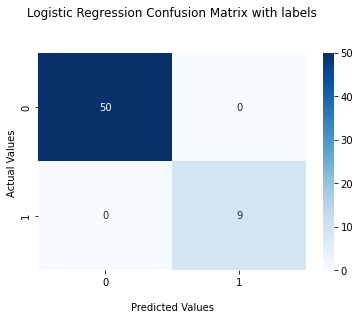

In [22]:
ax = sns.heatmap(cf_matrix2, annot=True, cmap='Blues')

ax.set_title('Logistic Regression Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


## Display the visualization of the Confusion Matrix.
plt.savefig("logreg.jpg")
plt.show()

<b> With logistic regression our model predict acurracy is 1 that being said everything is perfect. <b>

### 3.2 Use Naive Bayes to classify your data. Print/report your confusion matrix, classification report and AUC

In [23]:
# Initialize classifier:
gnb = GaussianNB()

# Train the classifier:
model = gnb.fit(X_train, y_train)

In [24]:
# Make predictions with the classifier:
predictive_labels = gnb.predict(X_test)

# Evaluate label (subsets) accuracy:
print(accuracy_score(y_test, predictive_labels))

cf_matrix=confusion_matrix(y_test, predictive_labels)

print(confusion_matrix(y_test, predictive_labels))
print(classification_report(y_test, predictive_labels))

cohen3= metrics.cohen_kappa_score(y_test, predictive_labels)
print('Cohen Kappa: %.3f' % cohen3)

auc_score3 = roc_auc_score(y_test,predictive_labels)
print('AUC: %.3f' % auc_score3)

1.0
[[50  0]
 [ 0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

Cohen Kappa: 1.000
AUC: 1.000


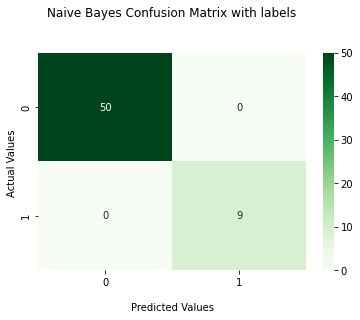

In [25]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Greens')

ax.set_title('Naive Bayes Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.savefig("naive.jpg")
plt.show()

**With navie base model the predict acurracy is 1, it shows same the logistic regression.**

### 3.3 Use KNN to classify your data. First find the optimal k and than run you classification. Print/report your confusion matrix, classification report and AUC

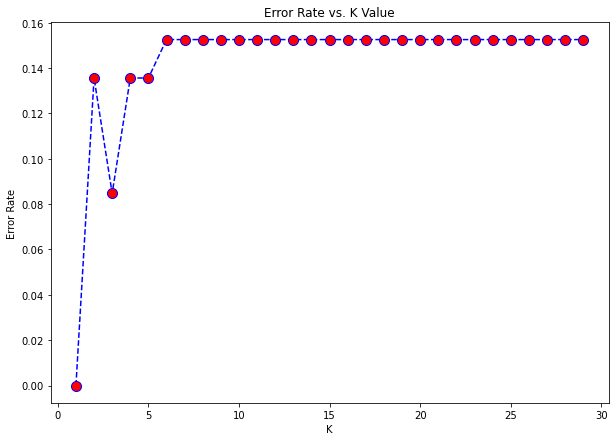

In [26]:
error_rates = []

for a in range(1, 30):
    k = a
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    error_rates.append(np.mean(y_test - preds))
    
#plot error rates against number of neighbors
plt.figure(figsize=(10, 7))
plt.plot(range(1,30),error_rates,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.savefig('knn.png')
plt.show()

In [27]:
#Train classifier on the optimal k that we chose from the plot
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
#Classification report
#from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

cohen=metrics.cohen_kappa_score(y_test, preds)
print('Cohen Kappa: %.3f' % cohen)

auc_score = roc_auc_score(y_test,preds)
print('AUC: %.3f' % auc_score)

[[49  1]
 [ 6  3]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        50
           1       0.75      0.33      0.46         9

    accuracy                           0.88        59
   macro avg       0.82      0.66      0.70        59
weighted avg       0.87      0.88      0.86        59

Cohen Kappa: 0.406
AUC: 0.657


**we see that for gas prediction it predicted well, but for disel it predicted as gas, model is biased. and we see that its imbalanced data. this should be handled.**

### 3.4 Choose one: SVM or Random Forest to classify your data. Print/report your confusion matrix, classification report and AUC.

In [28]:
# define model
clf = SVC()
model3=clf.fit(X_train, y_train)

In [29]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

cohen1=metrics.cohen_kappa_score(y_test, y_pred)
print('Cohen Kappa: %.3f' % cohen1)

auc_score1 = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc_score1)

Accuracy: 0.847457627118644
[[50  0]
 [ 9  0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        50
           1       0.00      0.00      0.00         9

    accuracy                           0.85        59
   macro avg       0.42      0.50      0.46        59
weighted avg       0.72      0.85      0.78        59

Precision: 0.0
Recall: 0.0
Cohen Kappa: 0.000
AUC: 0.500


/Users/nithinreddynagapur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nithinreddynagapur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nithinreddynagapur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

**SVM model also shows the same classification as KNN. (Cause, Imbalanced Data)**

### 3.5 Compare your results and comment on your findings. Which one(s) did the best job? What could have been the problem with the ones that did not work? etc.

**By comparing all the four models' logic regression, the naive base classified gas and diesel correctly, whereas KNN and SVM classified gas but were unable to classify diesel correctly because of imbalanced data. In my eyes, imbalanced works well with logistic regression and naive compared to KNN and SVM.**

## 4. Bonus question (5 extra points)
**Try to fix the inbalanced nature of the data with a tool from the lecture. Run one of the classification methods (preferable one that "failed" before) and see if you get better results.**

Let's us verify our dataset is imbalnced or not.

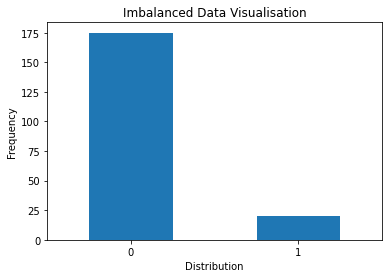

In [30]:
count_class = pd.value_counts(df2['fuel_type'], sort=True)
count_class.plot(kind='bar',rot=0)
plt.ylabel('Frequency')
plt.xlabel('Distribution')
plt.title('Imbalanced Data Visualisation')
plt.show()

From seeing above graph it's clear that, there is some imbalance data. 

In [31]:
Gas = df2[df2['fuel_type'] == 0]

In [32]:
Gas.shape

(175, 15)

In [33]:
Desiel = df2[df2['fuel_type'] == 1]

In [34]:
Desiel.shape

(20, 15)

As KNN & SVM doesn't able to classify diesel properly due to imbalance in nature, I am going to try Oversampling and UnderSampling to handle the imbalanced data set.

<h5>OverSampling</h5>

In [35]:
from imblearn.over_sampling import SMOTE #import Oversampling Libraries

In [36]:
print('Original dataset shape %s' % Counter(y))
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 175, 1: 20})
Resampled dataset shape Counter({0: 175, 1: 175})


In [37]:
X_res.shape #shape of new data dimension

(350, 14)

In [38]:
y_res.shape

(350,)

In [39]:
clf1 = SVC()
model4 = clf1.fit(X_train, y_train)

In [40]:
#Predict the response for test dataset
y_pred = clf.predict(X_res)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_res, y_pred))
print(confusion_matrix(y_res, y_pred))
print(classification_report(y_res, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_res, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_res, y_pred))

cohen_1 = metrics.cohen_kappa_score(y_res, y_pred)
print('Cohen Kappa: %.3f' % cohen_1)

auc_score_1 = roc_auc_score(y_res, y_pred)
print('AUC: %.3f' % auc_score_1)

Accuracy: 0.5
[[175   0]
 [175   0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       175
           1       0.00      0.00      0.00       175

    accuracy                           0.50       350
   macro avg       0.25      0.50      0.33       350
weighted avg       0.25      0.50      0.33       350

Precision: 0.0
Recall: 0.0
Cohen Kappa: 0.000
AUC: 0.500


/Users/nithinreddynagapur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nithinreddynagapur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nithinreddynagapur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [43]:
#Train classifier on the optimal k that we chose from the plot
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
preds = knn.predict(X_res)
#Classification report
#from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_res, preds))
print(classification_report(y_res, preds))

cohen_2=metrics.cohen_kappa_score(y_res, preds)
print('Cohen Kappa: %.3f' % cohen_2)

auc_score_2 = roc_auc_score(y_res,preds)
print('AUC: %.3f' % auc_score_2)

[[173   2]
 [104  71]]
              precision    recall  f1-score   support

           0       0.62      0.99      0.77       175
           1       0.97      0.41      0.57       175

    accuracy                           0.70       350
   macro avg       0.80      0.70      0.67       350
weighted avg       0.80      0.70      0.67       350

Cohen Kappa: 0.394
AUC: 0.697


In [46]:
print('After handling the imbalanced dataset with oversampling library SMOTE KNN accuracy is {}% whereas SVM shows the same accuracy {}%'.format(auc_score_2,auc_score_1))

After handling the imbalanced dataset with oversampling library SMOTE KNN accuracy is 0.6971428571428572% whereas SVM shows the same accuracy 0.5%


<h5> UnderSampling <h5>

In [47]:
from imblearn.under_sampling import TomekLinks

In [48]:
tl = TomekLinks()
X_re, y_re = tl.fit_resample(X, y)

In [49]:
#Train classifier on the optimal k that we chose from the plot
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
preds = knn.predict(X_re)
#Classification report
#from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_re, preds))
print(classification_report(y_re, preds))

cohen_3=metrics.cohen_kappa_score(y_re, preds)
print('Cohen Kappa: %.3f' % cohen_3)

auc_score_3 = roc_auc_score(y_re,preds)
print('AUC: %.3f' % auc_score_3)

[[170   1]
 [ 10  10]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       171
           1       0.91      0.50      0.65        20

    accuracy                           0.94       191
   macro avg       0.93      0.75      0.81       191
weighted avg       0.94      0.94      0.93       191

Cohen Kappa: 0.617
AUC: 0.747


In [50]:
clf2 = SVC()
model5 = clf2.fit(X_train, y_train)

In [52]:
#Predict the response for test dataset
y_pred = clf.predict(X_re)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_re, y_pred))

print(confusion_matrix(y_re, y_pred))

print(classification_report(y_re, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_re, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_re, y_pred))

cohen_4=metrics.cohen_kappa_score(y_re, y_pred)
print('Cohen Kappa: %.3f' % cohen_4)

auc_score_4 = roc_auc_score(y_re, y_pred)
print('AUC: %.3f' % auc_score_4)

Accuracy: 0.8952879581151832
[[171   0]
 [ 20   0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       171
           1       0.00      0.00      0.00        20

    accuracy                           0.90       191
   macro avg       0.45      0.50      0.47       191
weighted avg       0.80      0.90      0.85       191

Precision: 0.0
Recall: 0.0
Cohen Kappa: 0.000
AUC: 0.500


/Users/nithinreddynagapur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nithinreddynagapur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nithinreddynagapur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [54]:
print('After handling the imbalanced dataset with oversampling library SMOTE KNN accuracy is {} % whereas SVM shows the same accuracy {}'.format(auc_score_3,auc_score_4))

After handling the imbalanced dataset with oversampling library SMOTE KNN accuracy is 0.747076023391813 % whereas SVM shows the same accuracy 0.5


# Conclusion

**According my understanding after do this home work, LinearRegression, Navie Base works well with imbalnced data where as KNN & SVM doesn't able to classify our prediction. I have noted one thing that even after handling imbalanced data with both oversampling and undersampling SVM didn't worked it has the same accuracy with 50%. However, KNN prediction accuracy increased with undersampling by 9%.**

# References

1. CS746 Lecture Slides
2. Skitlearn Libraries
3. Partial code from other python notebook uploded by professor
4. Kaggle